In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from dateutil import parser

%matplotlib inline

In [99]:
df=pd.read_csv('../Data/Subcription App Behaviour.csv')

In [100]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [102]:
df['hour']=df.hour.str.slice(1,3).astype(int)

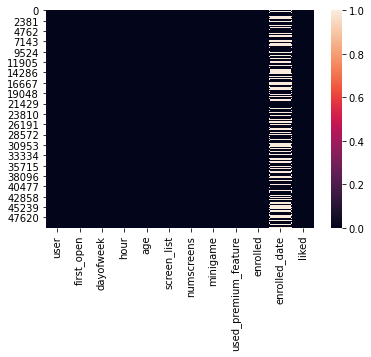

In [103]:
sns.heatmap(df.isnull())

In [104]:
df1=df.copy().drop(columns=['user','screen_list','enrolled_date','first_open'])
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   dayofweek             50000 non-null  int64
 1   hour                  50000 non-null  int32
 2   age                   50000 non-null  int64
 3   numscreens            50000 non-null  int64
 4   minigame              50000 non-null  int64
 5   used_premium_feature  50000 non-null  int64
 6   enrolled              50000 non-null  int64
 7   liked                 50000 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 2.9 MB


,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


In [105]:
dow=pd.get_dummies(df1['dayofweek'],drop_first=True)


In [106]:
df1 = pd.concat([df1,dow],axis=1)


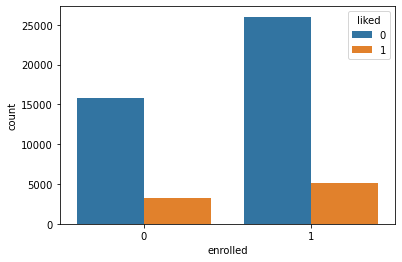

In [107]:
sns.countplot(x='enrolled',hue='liked',data=df1)

In [108]:
from sklearn.model_selection import train_test_split
X=df1.drop('enrolled',axis=1)
y=df1['enrolled']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [110]:
X_train.count

<bound method DataFrame.count of        dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
21388          2    15   38          51         0                     0   
42853          4     6   27          15         0                     1   
41860          2    18   28          24         0                     0   
33322          6     3   20          13         0                     0   
16289          2     8   39          14         0                     1   
...          ...   ...  ...         ...       ...                   ...   
43723          4    18   29          10         1                     0   
32511          1    15   38          12         0                     0   
5192           2    21   33          28         0                     0   
12172          5    18   51          20         0                     0   
33003          1    17   35          13         0                     0   

       liked  1  2  3  4  5  6  
21388      0  0  1  0  0  0  0  


In [111]:
y_test

26247    1
35067    1
34590    1
16668    1
12196    0
        ..
31857    1
31181    1
43869    1
19885    1
25782    1
Name: enrolled, Length: 16500, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_pred=regressor.predict(X_test)



In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)

0.6644242424242425

In [115]:
df1.describe()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,1,2,3,4,5,6
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000
mean,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,0.142780,0.12630,0.133180,0.150620,0.148460,0.14836
std,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,0.349852,0.33219,0.339773,0.357682,0.355559,0.35546
min,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
50%,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
75%,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
max,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000


# feature scaling

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [119]:
df['screen_list'][0]

'idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login'

In [118]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1


In [125]:
seperatedscreens=df['screen_list'].to_list

In [138]:
df['screen_count']=df.screen_list.str.get_dummies

In [143]:
df['screen_count'].drop

<bound method Series.drop of 0        <bound method StringMethods.get_dummies of <pa...
1        <bound method StringMethods.get_dummies of <pa...
2        <bound method StringMethods.get_dummies of <pa...
3        <bound method StringMethods.get_dummies of <pa...
4        <bound method StringMethods.get_dummies of <pa...
                               ...                        
49995    <bound method StringMethods.get_dummies of <pa...
49996    <bound method StringMethods.get_dummies of <pa...
49997    <bound method StringMethods.get_dummies of <pa...
49998    <bound method StringMethods.get_dummies of <pa...
49999    <bound method StringMethods.get_dummies of <pa...
Name: screen_count, Length: 50000, dtype: object>

In [146]:
df.drop(['screen_count'],axis=1)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,46:17.9,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,47:52.9,0
49996,169179,05:17.8,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,41:51.2,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,33:04.3,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,35:38.7,0


In [147]:
df['screencount']=df.screen_list.str.count(",")

In [148]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,screencount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,11.983120
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,7.096628
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,11.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,16.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,78.000000


In [151]:
print(df['screencount'].values)

[12 10  2 ...  9 18 18]


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
 12  screen_count          50000 non-null  object
 13  screencount           50000 non-null  int64 
dtypes: int32(1), int64(9), object(4)
memory usage: 5.1+ MB


In [155]:
df2=df.drop(['user','first_open','enrolled_date','screen_count'],axis=1)

In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   dayofweek             50000 non-null  int64 
 1   hour                  50000 non-null  int32 
 2   age                   50000 non-null  int64 
 3   screen_list           50000 non-null  object
 4   numscreens            50000 non-null  int64 
 5   minigame              50000 non-null  int64 
 6   used_premium_feature  50000 non-null  int64 
 7   enrolled              50000 non-null  int64 
 8   liked                 50000 non-null  int64 
 9   screencount           50000 non-null  int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 3.6+ MB


In [177]:
split_screens=df2.screen_list.str.split(expand=True,pat=',')
split_screens

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,...,None,None,None,None,None,None,None,None,None,None
1,joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,...,None,None,None,None,None,None,None,None,None,None
2,Splash,Cycle,Loan,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,...,None,None,None,None,None,None,None,None,None,None
4,idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Splash,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,product_review,product_review,product_review3,...,None,None,None,None,None,None,None,None,None,None
49996,Cycle,Splash,Home,RewardsContainer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
49997,joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home,...,None,None,None,None,None,None,None,None,None,None
49998,Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,...,None,None,None,None,None,None,None,None,None,None


In [178]:
split_screens.isnull()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
49996,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
49997,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
49998,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [181]:
split_screens=split_screens.replace(to_replace='None',value=0)

In [187]:
split_screens

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,...,None,None,None,None,None,None,None,None,None,None
1,joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,...,None,None,None,None,None,None,None,None,None,None
2,Splash,Cycle,Loan,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,...,None,None,None,None,None,None,None,None,None,None
4,idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Splash,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,product_review,product_review,product_review3,...,None,None,None,None,None,None,None,None,None,None
49996,Cycle,Splash,Home,RewardsContainer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
49997,joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home,...,None,None,None,None,None,None,None,None,None,None
49998,Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,...,None,None,None,None,None,None,None,None,None,None


In [191]:
split_screens.max(axis=0)

<bound method Series.count of 0    product_review5
dtype: object>